# [GGUF (Georgi Gerganov Unified Format)](https://github.com/unslothai/unsloth?tab=readme-ov-file)
- GGUF 포맷은 Georgi Gerganov에 의해 개발된 딥러닝 모델 저장용 단일 파일 포맷입니다.
- 이 포맷은 메타데이터와 텐서 데이터를 저장하며, 다양한 양자화를 지원하여 모델의 크기를 줄이고 추론 속도를 높입니다.
- GGUF는 주로 GGML 라이브러리 기반 런타임에서 사용되며, CPU에서도 실행 가능하여 큰 유연성과 확장성을 제공합니다.

## [GGML이란?](https://www.ibm.com/kr-ko/think/topics/gguf-versus-ggml)
- 개발자 게오르기 게르가노프(Georgi Gerganov)가 만든 `GGML`은 `GGUF` 바로 이전의 파일 형식입니다.
- `GGML`은 다양한 하드웨어 플랫폼에서 고성능을 발휘하도록 설계된 텐서 라이브러리였습니다.
- `GGML`은 표준 하드웨어에서 대규모 언어 모델에 액세스할 수 있도록 하기 위한 초기 노력이었습니다. 그러나 유연성과 확장성 측면에서 제한적이었습니다.

`GGUF`는 `GGML` 제한 사항을 해결하고 이전 모델과의 호환성을 유지하면서 새로운 기능을 추가할 수 있게 합니다. `GGUF`는 주요 변경 사항을 제거하여 최신 버전으로의 전환이 용이하게 하고 다양한 모델을 지원하는 포괄적인 솔루션입니다.

## [GGUF 파일에는 두 가지가 기록된다.](https://bitwise-life.tistory.com/4)
1. 모델의 Weight Tensor 값과 텐서 정보
  - Tensor 의 이름
  - Tensor 의 차원 수
  - Tensor 의 Shape
  - Tensor 의 데이터 타입
  - Tensor 데이터가 위치한 Offset
2. Key-Value 형식의 메타데이터
  - Key는 ASCII 문자와 '.' 으로 계층을 표현한다.
    - 다음처럼 쓸 수 있다. llama.attention.head_count_kv
  - 먼저 모델의 세부 정보들이 포함되어야한다. 예를 들어
    - 입력 토큰 길이 (context length)
    - 임베딩 크기 (embedding length)
    - 피드 포워드 길이 (feed forward length)
  - 여기에 추가로 Tokenizer 의 정보도 단일 파일에 포함되어야한다.
    - bos token id
    - eos token id
    - uknown token id
    - seperate token id
    - padding token id
    - Vocab file


## GGUF 장점
- `단일 파일 구조`: 모델을 하나의 파일로 쉽게 공유할 수 있습니다. 이는 모델의 배포와 사용을 간편하게 만듭니다.
- `메타데이터와 텐서 데이터`: 파일 내에 모델의 가중치(weight) 텐서 값들과 메타데이터가 Key-Value 형식으로 저장됩니다. 메타데이터는 모델의 구조, 버전, 텐서 개수 등을 포함합니다.
- `다양한 양자화 지원`: GGUF는 16-bit 부동 소수점(floating point)뿐만 아니라 8-bit, 6-bit, 5-bit, 4-bit, 3-bit, 그리고 2-bit까지의 다양한 양자화된 텐서 타입을 지원합니다. 이는 모델을 더 작게 만들어 추론 속도를 높이고, 메모리 사용을 줄이는 데 유용합니다.

## [Unsloth Models](https://docs.unsloth.ai/get-started/all-our-models)

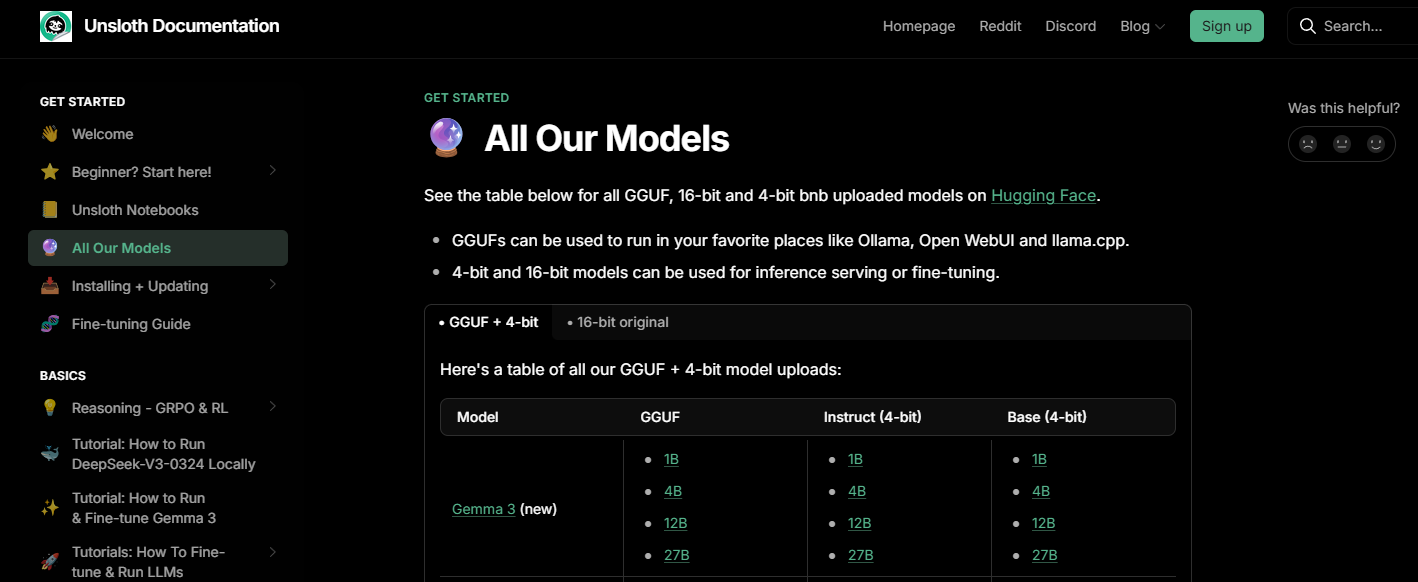

# [예제](https://docs.unsloth.ai/get-started/unsloth-notebooks)

## install

### Do this only in Colab notebooks!

In [ ]:
# Do this only in Colab notebooks! Otherwise use pip install unsloth
# import torch; v = re.match(r"[0-9\.]{3,}", str(torch.__version__)).group(0)

# xformers = "xformers==" + ("0.0.32.post2" if v == "2.8.0" else "0.0.29.post3")
# !pip install --no-deps bitsandbytes accelerate {xformers} peft trl triton cut_cross_entropy unsloth_zoo
# !pip install sentencepiece protobuf "datasets>=3.4.1,<4.0.0" "huggingface_hub>=0.34.0" hf_transfer
# !pip install --no-deps unsloth
# !pip install transformers==4.55.4
# !pip install --no-deps trl==0.22.2

### No Colab notebooks!

- 설치된 파이썬 버전 확인 

In [1]:
ls /usr/bin/python*

/usr/bin/python3@            /usr/bin/python3.12-config@
/usr/bin/python3.10*         /usr/bin/python3.13*
/usr/bin/python3.10-config@  /usr/bin/python3.13-config@
/usr/bin/python3.11*         /usr/bin/python3.9*
/usr/bin/python3.11-config@  /usr/bin/python3.9-config@
/usr/bin/python3.12*


- 주피터 파이썬 버전 확인 

In [4]:
import sys
print(sys.executable)

/usr/local/bin/python


- 시스템 파이썬 버전을 주피터 파이썬 버전으로 변경 
    ```shell
    sudo ln -sf /usr/bin/[주피터 파이썬 버전] /usr/bin/python
    ```

In [5]:
%%bash

sudo ln -sf /usr/bin/python3.10 /usr/bin/python
python --version

Python 3.12.3


- 라이브러리 설치 

In [6]:
!pip install torch==2.8.0 bitsandbytes==0.47.0 accelerate==1.10.1 peft==0.17.1 trl==0.22.2 triton==3.4.0 cut_cross_entropy==25.1.1 sentencepiece==0.2.1 protobuf==6.32.0 datasets==3.6.0 huggingface_hub==0.34.4 hf_transfer==0.1.9
!{sys.executable} -m pip install --upgrade unsloth unsloth_zoo 
!{sys.executable} -m pip --no-deps unsloth
!pip install --upgrade git+https://github.com/ggerganov/llama.cpp
    
!pip install transformers==4.55.4
!pip install --no-deps trl==0.22.2


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.3/61.3 MB 98.4 MB/s  0:00:006m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 544.8/544.8 kB 5.1 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 20.8 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.5/561.5 kB 5.8 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 41.1 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 43.5 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 26.1 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 95.8 MB/s  0:00:006m0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 84.8 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 38.5 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 802.0/802.0 kB 9.0 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 83.2 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30/30 [trl]32m29/30 [trl]set

## [Load Model](https://huggingface.co/unsloth)

In [7]:
from unsloth import FastModel
import torch

fourbit_models = [
    # 4bit dynamic quants for superior accuracy and low memory use
    "unsloth/gemma-3-1b-it-unsloth-bnb-4bit",
    "unsloth/gemma-3-4b-it-unsloth-bnb-4bit",
    "unsloth/gemma-3-12b-it-unsloth-bnb-4bit",
    "unsloth/gemma-3-27b-it-unsloth-bnb-4bit",

    # Other popular models!
    "unsloth/Llama-3.1-8B",
    "unsloth/Llama-3.2-3B",
    "unsloth/Llama-3.3-70B",
    "unsloth/mistral-7b-instruct-v0.3",
    "unsloth/Phi-4",
] # More models at https://huggingface.co/unsloth

model, tokenizer = FastModel.from_pretrained(
    model_name = "unsloth/gemma-3-1b-it",
    max_seq_length = 8184, # Choose any for long context!
    load_in_4bit = True,  # 4 bit quantization to reduce memory
    load_in_8bit = False, # [NEW!] A bit more accurate, uses 2x memory
    full_finetuning = False, # [NEW!] We have full finetuning now!
    # token = "hf_...", # use one if using gated models
)

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
🦥 Unsloth Zoo will now patch everything to make training faster!
==((====))==  Unsloth 2025.10.1: Fast Gemma3 patching. Transformers: 4.55.4.
   \\   /|    NVIDIA RTX A5000. Num GPUs = 1. Max memory: 23.573 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.8.0+cu128. CUDA: 8.6. CUDA Toolkit: 12.8. Triton: 3.4.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.32.post2. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!
Unsloth: Gemma3 does not support SDPA - switching to fast eager.


model.safetensors:   0%|          | 0.00/1.00G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/233 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.model:   0%|          | 0.00/4.69M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/33.4M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/35.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/670 [00:00<?, ?B/s]

## PEFT : LoRA

In [8]:
model = FastModel.get_peft_model(
    model,
    finetune_vision_layers     = False, # Turn off for just text!
    finetune_language_layers   = True,  # Should leave on!
    finetune_attention_modules = True,  # Attention good for GRPO
    finetune_mlp_modules       = True,  # SHould leave on always!
    r = 16,           # 0보다 큰 어떤 숫자도 선택 가능! 8, 16, 32, 64, 128이 권장됩니다.
    lora_alpha = 16,  # Recommended alpha == r at least
    lora_dropout = 0,
    bias = "none",   # 바이어스를 지원합니다.
    random_state = 3407
)

Unsloth: Making `model.base_model.model.model` require gradients


## datasets

In [9]:
from datasets import load_dataset

dataset = load_dataset("csv", data_files="df_train.csv", split="train")
dataset

Generating train split: 0 examples [00:00, ? examples/s]

Dataset({
    features: ['user_input', 'reference', 'reference_video_url'],
    num_rows: 50
})

In [10]:
# EOS_TOKEN은 문장의 끝을 나타내는 토큰입니다. 이 토큰을 추가해야 합니다.
EOS_TOKEN = tokenizer.eos_token

# AlpacaPrompt를 사용하여 지시사항을 포맷팅하는 함수입니다.
alpaca_prompt = """Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
{}

### Response:
{}"""

# 주어진 예시들을 포맷팅하는 함수입니다.
def formatting_prompts_func(examples):
    instructions = examples["user_input"]  # 지시사항을 가져옵니다.
    outputs = examples["reference"]  # 출력값을 가져옵니다.
    texts = []  # 포맷팅된 텍스트를 저장할 리스트입니다.
    for instruction, output in zip(instructions, outputs):
        # EOS_TOKEN을 추가해야 합니다. 그렇지 않으면 생성이 무한히 진행될 수 있습니다.
        text = alpaca_prompt.format(instruction, output) + EOS_TOKEN
        texts.append(text)
    return {
        "text": texts,  # 포맷팅된 텍스트를 반환합니다.
    }

# 데이터셋에 formatting_prompts_func 함수를 적용합니다. 배치 처리를 활성화합니다.
dataset = dataset.map(
    formatting_prompts_func,
    batched=True,
)

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

In [11]:
dataset[0]

{'user_input': '갑상선 기능 항진증이 어린이에게 미치는 영향은 무엇인가요?',
 'reference': '갑상선 기능 항진증은 어린이가 체력을 소모시키는 병으로, 이로 인해 땀을 많이 흘릴 수 있습니다. 그러나 땀을 많이 흘린다고 해서 반드시 심각한 문제가 있는 것은 아니며, 다른 이상이 없는 경우에는 대개 체계적인 경우로 생각할 수 있습니다.',
 'reference_video_url': 'https://www.youtube.com/watch?v=8GwNlF44ntY&list=PLC6Msm1YCNw-NJBk4ajBkTeS2rJULiT1b',
 'text': 'Below is an instruction that describes a task. Write a response that appropriately completes the request.\n\n### Instruction:\n갑상선 기능 항진증이 어린이에게 미치는 영향은 무엇인가요?\n\n### Response:\n갑상선 기능 항진증은 어린이가 체력을 소모시키는 병으로, 이로 인해 땀을 많이 흘릴 수 있습니다. 그러나 땀을 많이 흘린다고 해서 반드시 심각한 문제가 있는 것은 아니며, 다른 이상이 없는 경우에는 대개 체계적인 경우로 생각할 수 있습니다.<end_of_turn>'}

In [12]:
from trl import SFTTrainer, SFTConfig

tokenizer.padding_side = "right"  # 토크나이저의 패딩을 오른쪽으로 설정합니다.

# SFTTrainer를 사용하여 모델 학습 설정
trainer = SFTTrainer(
    model=model,  # 학습할 모델
    tokenizer=tokenizer,  # 토크나이저
    train_dataset=dataset,  # 학습 데이터셋
    eval_dataset=dataset,# 테디노트에서 추가된 eval dataset
    dataset_text_field="text",  # 데이터셋에서 텍스트 필드의 이름
    dataset_num_proc=2,  # 데이터 처리에 사용할 프로세스 수
    packing=False,  # 짧은 시퀀스에 대한 학습 속도를 5배 빠르게 할 수 있음
    args=SFTConfig(
        max_seq_length=7994,  # 최대 시퀀스 길이
        per_device_train_batch_size=2,  # 각 디바이스당 훈련 배치 크기
        gradient_accumulation_steps=4,  # 그래디언트 누적 단계
        warmup_steps=5,  # 웜업 스텝 수
        num_train_epochs=10,  # 훈련 에폭 수
        max_steps=100,  # 최대 스텝 수 # 공식문서에는 60
        logging_steps=1,  # logging 스텝 수
        learning_rate=2e-4,  # 학습률
        fp16=not torch.cuda.is_bf16_supported(),  # fp16 사용 여부, bf16이 지원되지 않는 경우에만 사용
        bf16=torch.cuda.is_bf16_supported(),  # bf16 사용 여부, bf16이 지원되는 경우에만 사용
        optim="adamw_8bit",  # 최적화 알고리즘
        weight_decay=0.01,  # 가중치 감소
        lr_scheduler_type="cosine",  # 학습률 스케줄러 유형 # 공식은 linear
        seed=123,  # 랜덤 시드 # 공식은 3407
        output_dir="outputs",  # 출력 디렉토리
    ),
)

num_proc must be <= 50. Reducing num_proc to 50 for dataset of size 50.


Unsloth: Tokenizing ["text"] (num_proc=50):   0%|          | 0/50 [00:00<?, ? examples/s]

num_proc must be <= 50. Reducing num_proc to 50 for dataset of size 50.


## Train

In [13]:
# @title Show current memory stats
gpu_stats = torch.cuda.get_device_properties(0)
start_gpu_memory = round(torch.cuda.max_memory_reserved() / 1024 / 1024 / 1024, 3)
max_memory = round(gpu_stats.total_memory / 1024 / 1024 / 1024, 3)
print(f"GPU = {gpu_stats.name}. Max memory = {max_memory} GB.")
print(f"{start_gpu_memory} GB of memory reserved.")

GPU = NVIDIA RTX A5000. Max memory = 23.573 GB.
0.996 GB of memory reserved.


In [14]:
# @title Training model
trainer_stats = trainer.train()

==((====))==  Unsloth - 2x faster free finetuning | Num GPUs used = 1
   \\   /|    Num examples = 50 | Num Epochs = 15 | Total steps = 100
O^O/ \_/ \    Batch size per device = 2 | Gradient accumulation steps = 4
\        /    Data Parallel GPUs = 1 | Total batch size (2 x 4 x 1) = 8
 "-____-"     Trainable parameters = 13,045,760 of 1,012,931,712 (1.29% trained)


Step,Training Loss
1,3.110200
2,3.483400
3,2.974700
4,2.759600
5,2.693400
6,2.762700
7,2.681600
8,2.218900
9,2.122600
10,2.076100


In [15]:
# @title Show final memory and time stats
used_memory = round(torch.cuda.max_memory_reserved() / 1024 / 1024 / 1024, 3)
used_memory_for_lora = round(used_memory - start_gpu_memory, 3)
used_percentage = round(used_memory / max_memory * 100, 3)
lora_percentage = round(used_memory_for_lora / max_memory * 100, 3)
print(f"{trainer_stats.metrics['train_runtime']} seconds used for training.")
print(
    f"{round(trainer_stats.metrics['train_runtime']/60, 2)} minutes used for training."
)
print(f"Peak reserved memory = {used_memory} GB.")
print(f"Peak reserved memory for training = {used_memory_for_lora} GB.")
print(f"Peak reserved memory % of max memory = {used_percentage} %.")
print(f"Peak reserved memory for training % of max memory = {lora_percentage} %.")

158.7474 seconds used for training.
2.65 minutes used for training.
Peak reserved memory = 1.641 GB.
Peak reserved memory for training = 0.645 GB.
Peak reserved memory % of max memory = 6.961 %.
Peak reserved memory for training % of max memory = 2.736 %.


## Inference

In [16]:
from unsloth.chat_templates import get_chat_template
tokenizer = get_chat_template(
    tokenizer,
    chat_template = "gemma-3",
)

In [ ]:
messages = [{
    "role": "user",
    "content": "허니 햄버거 병이란 무엇인가요?",
}]

text = tokenizer.apply_chat_template(
    messages,
    add_generation_prompt = True, # Must add for generation
    tokenize=False,               # 반드시 False로 해야 문자열 반환됨
)

from transformers import TextStreamer

_ = model.generate(
    **tokenizer([text], return_tensors = "pt").to("cuda"),
    max_new_tokens = 64, # Increase for longer outputs!
    # Recommended Gemma-3 settings!
    temperature = 1.0, top_p = 0.95, top_k = 64,
    streamer = TextStreamer(tokenizer, skip_prompt = True),
)

허니 햄버거 병은 음식물과 세균이 감염되는 상태를 말하며, 특히 치아가 출생 시부터 제대로 발달하지 않으면 발생할 수 있습니다. 

좀 더 자세히 설명해 드릴게요.

### 허니 햄버거 병이란 무엇인가요?


## save model

### VLLM을 위한 float4 저장

In [25]:
base_model = "model" # 병합을 수행할 베이스 모델


In [28]:
model.save_pretrained_merged(
    base_model,
    tokenizer
)

config.json:   0%|          | 0.00/902 [00:00<?, ?B/s]

Found HuggingFace hub cache directory: /workspace/.cache/huggingface/hub
Checking cache directory for required files...
Cache check failed: model.safetensors not found in local cache.
Not all required files found in cache. Will proceed with downloading.


Unsloth: Preparing safetensor model files:   0%|          | 0/1 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/2.00G [00:00<?, ?B/s]

Unsloth: Merging weights into 16bit: 100%|██████████| 1/1 [00:08<00:00,  8.86s/it]


Unsloth: Merge process complete. Saved to `/workspace/model`


### GGUF 변환

In [29]:
# Quantization 방식 설정
quantization_method = "q8_0"  # "f16" "q8_0" "q4_k_m" "q5_k_m"

model.save_pretrained_gguf(
    base_model, # 사전학습 모델이 저장될 폴더명
    tokenizer=tokenizer,
    quantization_type=quantization_method,
)

## HuggingFace 업로드

### [HuggingFace API Key](https://huggingface.co/settings/tokens)

In [ ]:
import os

os.environ["HF_TOKEN"] = "hf_"

In [34]:
from huggingface_hub import login

login(
    token=os.environ["HF_TOKEN"]
)
print("로그인 성공")

로그인 성공


### 기존 레포지토리 삭제 

In [35]:
from huggingface_hub import HfApi

# API 인스턴스 생성
api = HfApi()

# 사용자의 Hugging Face 계정 ID
huggingface_id = "good593"
new_repo_id = f"{huggingface_id}/gemma3-finetune-diseases-gguf"

try:
    
    # 지정된 저장소를 완전히 삭제
    api.delete_repo(repo_id=new_repo_id)
    print("삭제가 완료되었습니다.")
except Exception as e:
    # 삭제할 저장소가 존재하지 않거나 권한이 없는 경우
    print("삭제할 대상이 없습니다.")

삭제가 완료되었습니다.


### 수동 업로드

In [37]:
try:
    
    # 지정된 저장소를 생성
    api.create_repo(repo_id=new_repo_id)
    print("생성이 완료되었습니다.")
except Exception as e:
    # 삭제할 저장소가 존재하지 않거나 권한이 없는 경우
    print("생성할 대상이 없습니다.")

생성이 완료되었습니다.


In [38]:
# 생성된 저장소에 파일 업로드 
api.upload_file(
    path_or_fileobj="./model.Q8_0.gguf",
    path_in_repo="model.Q8_0.gguf",
    repo_id=new_repo_id,
    repo_type="model",
    # token = "hf_"
)

Processing Files (0 / 0)                : |          |  0.00B /  0.00B            

New Data Upload                         : |          |  0.00B /  0.00B            

  ./model.Q8_0.gguf                     :   3%|2         | 27.6MB / 1.07GB            

CommitInfo(commit_url='https://huggingface.co/good593/gemma3-finetune-diseases-gguf/commit/f44eca04bae0e8d2af55054fbbab7f664e97b06f', commit_message='Upload model.Q8_0.gguf with huggingface_hub', commit_description='', oid='f44eca04bae0e8d2af55054fbbab7f664e97b06f', pr_url=None, repo_url=RepoUrl('https://huggingface.co/good593/gemma3-finetune-diseases-gguf', endpoint='https://huggingface.co', repo_type='model', repo_id='good593/gemma3-finetune-diseases-gguf'), pr_revision=None, pr_num=None)

### [hugging face 확인](https://huggingface.co/good593/gemma3-finetune-gguf)

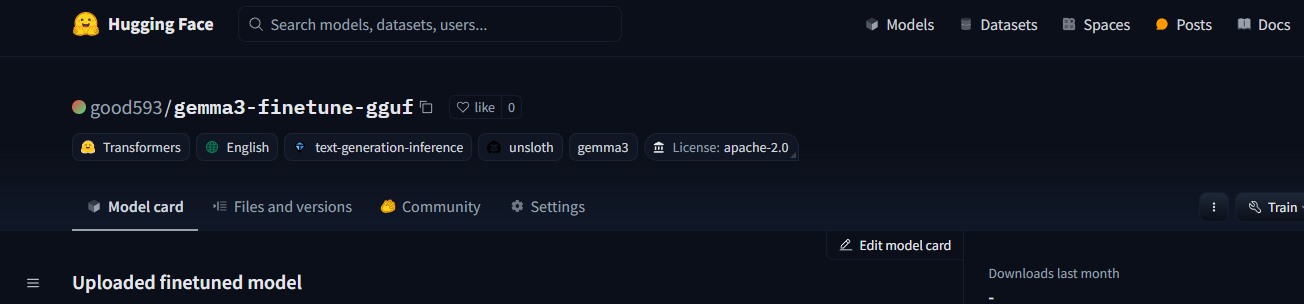

## Ollama 적용 

### gguf 파일 다운로드

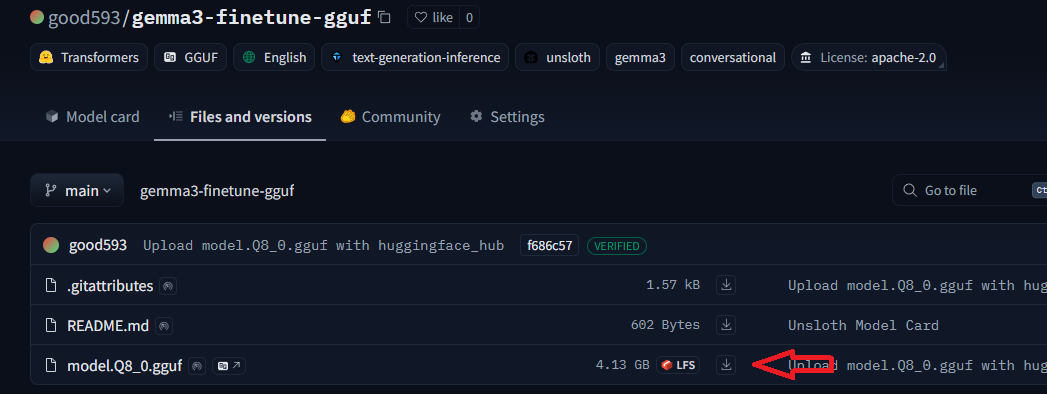

### Modelfile 생성

```Modelfile
FROM model.Q8_0.gguf

TEMPLATE """{{- if .System }}
<s>{{ .System }}</s>
{{- end }}
<s>Human:
{{ .Prompt }}</s>
<s>Assistant:
"""

SYSTEM """A chat between a curious user and an artificial intelligence assistant. The assistant gives helpful, detailed, and polite answers to the user's questions."""

PARAMETER temperature 0
PARAMETER num_predict 3000
PARAMETER num_ctx 4096
PARAMETER stop <s>
PARAMETER stop </s>
```

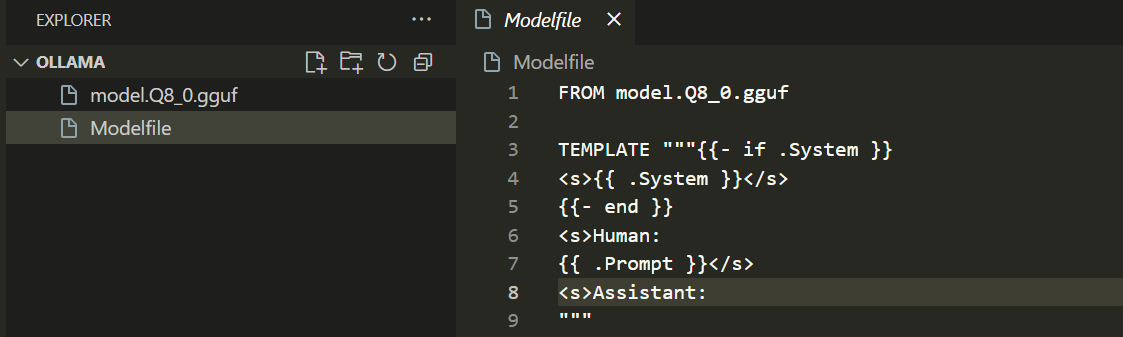

### Ollama Model 생성
```shell
# ollama create [올라마 모델명]:[테그] -f Modelfile
ollama create fine_tuning_gemma3:1b -f Modelfile 
```

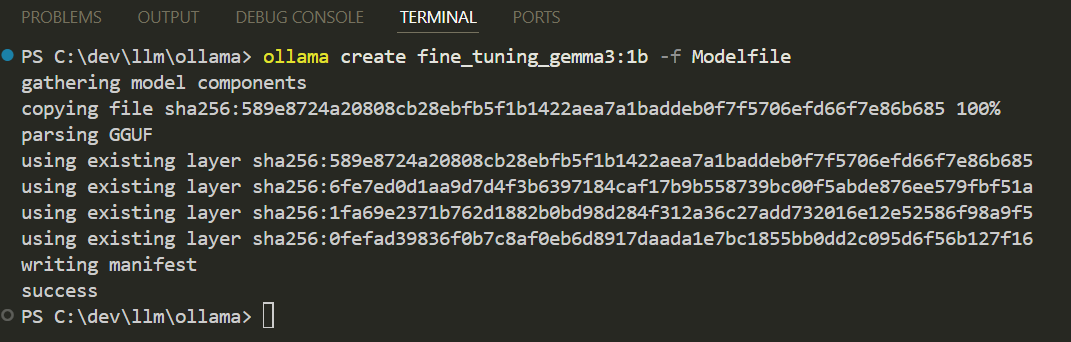

```shell
# 설치된 모든 모델 조회 
ollama list 
```

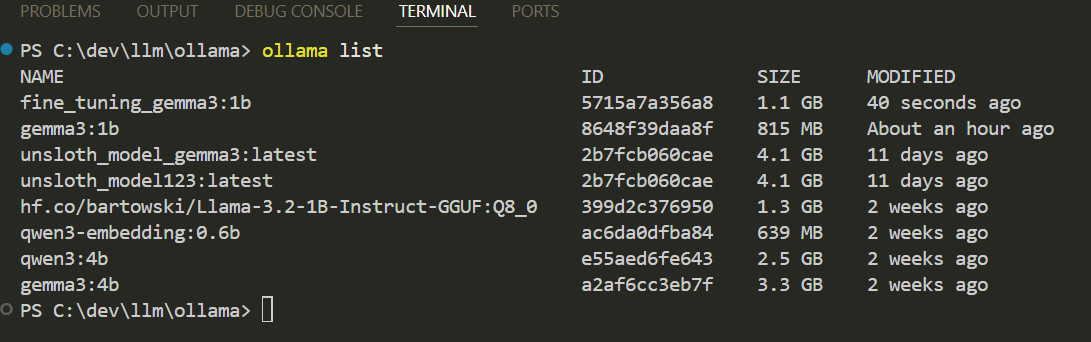

### Ollama Model 테스트 

- 학습하기 전 gemma3:1b

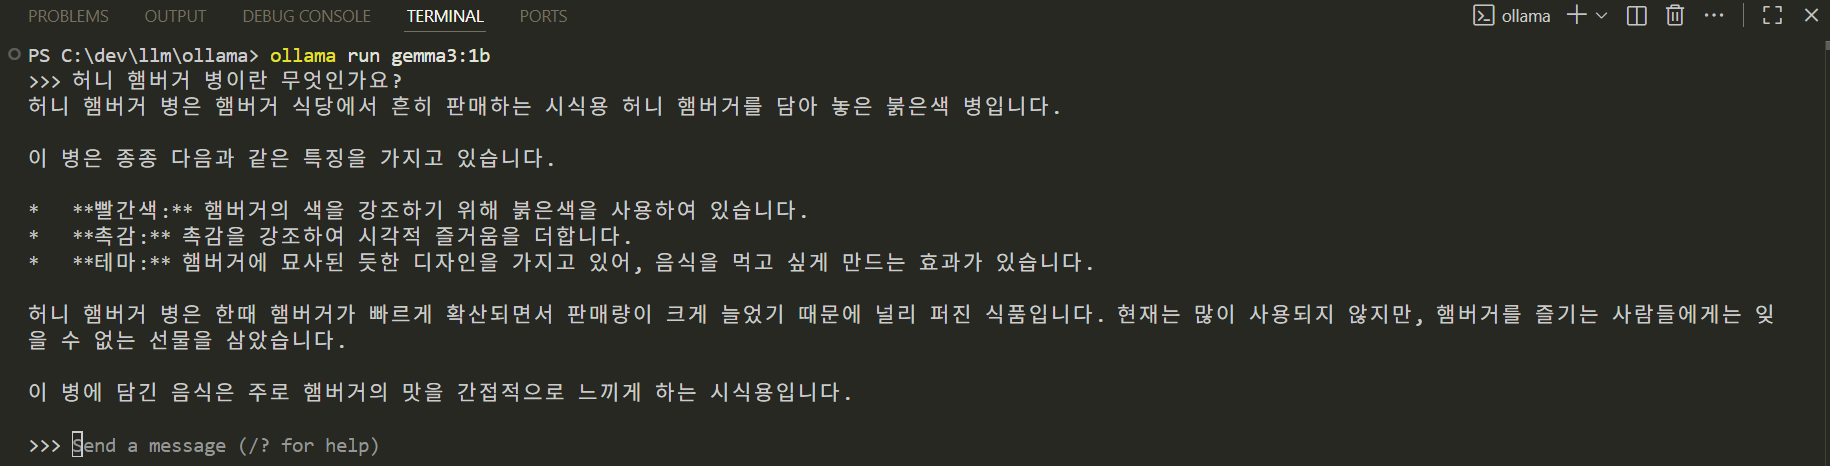

- 학습한 fine_tuning_gemma3:1b

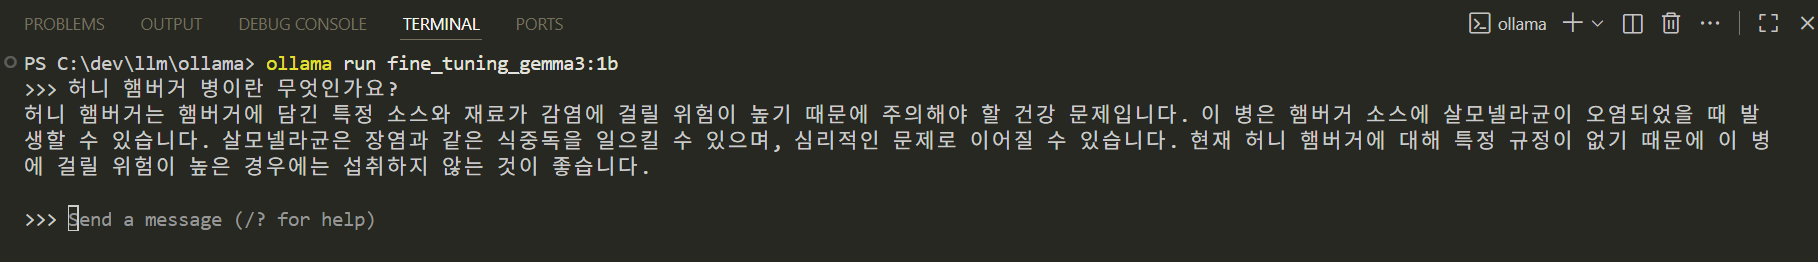